# Exploratory Data Analysis

In [1]:
%%html
<style>.dataframe td {white-space: nowrap;}</style>

In [2]:
# import modules
import pandas as pd
import numpy as np

# full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas format
pd.set_option('display.float_format', '{:_.0f}'.format)
# NOTE: underscore separaters ('_') are better than commas (',') because 
# numbers with underscores work in Python without any extra effort.
pd.set_option('display.max_columns', None)

# plotting modules
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["axes.formatter.min_exponent"] = 20  # no scientific notation in graphs
plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 10   # pad is in points... default is 6
import seaborn as sns
sns.set_theme()

In [3]:
%%time
# import data and functions
import rv_functions as rv

Wall time: 11.1 s


In [4]:
# rename imported data to remove rv prefix
try:
    GSCAT, GSDET, GSINF, MISSIONS, SPECIES, df = rv.GSCAT, rv.GSDET, rv.GSINF, rv.MISSIONS, rv.SPECIES, rv.df
    del rv.GSCAT, rv.GSDET, rv.GSINF, rv.MISSIONS, rv.SPECIES, rv.df
except:
    print('This step was already completed')

In [5]:
# list imported functions
list_of_imported_functions = dir(rv)
list_of_imported_functions = [x for x in list_of_imported_functions if x[0] != '_' and x not in ['pd', 'px']]

list_of_imported_functions

['aggregate_by_geo',
 'average_geo',
 'describe_species',
 'filter_by_min_species',
 'filter_by_species',
 'filter_dates',
 'filtered_monthly',
 'filtered_yearly',
 'format_monthly',
 'format_yearly',
 'get_species',
 'graph_species',
 'map_species',
 'print_species_data',
 'scatterplot_species',
 'search_species_by_name',
 'species_codes_by_percentile',
 'species_counts',
 'species_rank',
 'top_species_by_attribute',
 'top_x_species']

# Explore Species

### Most Common Species

In [6]:
rv.top_x_species(df, 20)

NAME   COUNT
SPEC                              
11                 HADDOCK  369782
14             SILVER HAKE  251446
23     REDFISH UNSEPARATED  179947
40         AMERICAN PLAICE  168269
10           COD(ATLANTIC)  119753
42     YELLOWTAIL FLOUNDER  114973
60       HERRING(ATLANTIC)  100350
4511       SHORT-FIN SQUID   71117
300       LONGHORN SCULPIN   69345
220          SPINY DOGFISH   62639
41          WITCH FLOUNDER   56951
12              WHITE HAKE   49453
201           THORNY SKATE   46668
204           WINTER SKATE   46213
2526     SNOW CRAB (QUEEN)   38379
16                 POLLOCK   38193
43         WINTER FLOUNDER   37742
13    SQUIRREL OR RED HAKE   32635
4321           SEA SCALLOP   32354
203           LITTLE SKATE   30537

In [7]:
top_20_species_list = list(rv.top_x_species(df, 20).index)
top_20_df = df[df['SPEC'].isin(top_20_species_list)]

In [8]:
# top 20 sorted by average DEPTH
rv.top_species_by_attribute(top_20_df, attribute='DEPTH', how_many=20)

NAME  MEAN_DEPTH  COUNTS
SPEC                                          
23     REDFISH UNSEPARATED         226  179947
41          WITCH FLOUNDER         204   56951
12              WHITE HAKE         201   49453
16                 POLLOCK         155   38193
14             SILVER HAKE         155  251446
13    SQUIRREL OR RED HAKE         151   32635
4511       SHORT-FIN SQUID         151   71117
220          SPINY DOGFISH         144   62639
201           THORNY SKATE         138   46668
40         AMERICAN PLAICE         128  168269
60       HERRING(ATLANTIC)         117  100350
2526     SNOW CRAB (QUEEN)         113   38379
10           COD(ATLANTIC)         105  119753
11                 HADDOCK         102  369782
204           WINTER SKATE          86   46213
4321           SEA SCALLOP          83   32354
300       LONGHORN SCULPIN          81   69345
203           LITTLE SKATE          79   30537
43         WINTER FLOUNDER          72   37742
42     YELLOWTAIL FLOUNDER          70  114973

In [9]:
# top 5 by max depth
rv.top_species_by_attribute(top_20_df, attribute='DEPTH', aggregation='max', how_many=5)

NAME  MAX_DEPTH  COUNTS
SPEC                                        
4511      SHORT-FIN SQUID      1_608   71117
41         WITCH FLOUNDER        898   56951
2526    SNOW CRAB (QUEEN)        813   38379
23    REDFISH UNSEPARATED        794  179947
11                HADDOCK        785  369782

In [10]:
# top 20 sorted by weight
rv.top_species_by_attribute(top_20_df, attribute='FWT', how_many=20)

NAME  MEAN_FWT  COUNTS
SPEC                                        
16                 POLLOCK     2_298   38193
10           COD(ATLANTIC)     1_807  119753
220          SPINY DOGFISH     1_507   62639
204           WINTER SKATE     1_289   46213
12              WHITE HAKE     1_041   49453
201           THORNY SKATE       897   46668
11                 HADDOCK       810  369782
203           LITTLE SKATE       558   30537
43         WINTER FLOUNDER       413   37742
23     REDFISH UNSEPARATED       338  179947
41          WITCH FLOUNDER       285   56951
40         AMERICAN PLAICE       256  168269
42     YELLOWTAIL FLOUNDER       252  114973
13    SQUIRREL OR RED HAKE       196   32635
300       LONGHORN SCULPIN       177   69345
2526     SNOW CRAB (QUEEN)       161   38379
60       HERRING(ATLANTIC)       160  100350
14             SILVER HAKE       150  251446
4511       SHORT-FIN SQUID       145   71117
4321           SEA SCALLOP       130   32354

In [11]:
# top 5 by max weight
rv.top_species_by_attribute(top_20_df, attribute='FWT', aggregation='max', how_many=5)

NAME  MAX_FWT  COUNTS
SPEC                                
10    COD(ATLANTIC)   38_000  119753
204    WINTER SKATE   33_615   46213
12       WHITE HAKE   25_760   49453
16          POLLOCK   17_000   38193
201    THORNY SKATE   14_000   46668

### Deepest Species

In [12]:
# deepest average depth for species (rare)
rv.top_species_by_attribute(df, attribute='DEPTH', how_many=20, min_species=None)

NAME  MEAN_DEPTH  COUNTS
SPEC                                              
186     TAANINGICHTHYS MINIMUS       1_806       1
38                  SWALLOWERS       1_806       1
750               CARDINALFISH       1_806       1
800       POROMITRA CRASSICEPS       1_667       1
494      SCOPELOBERYX ROBUSTUS       1_667       2
1032   BATHYTROCTES MICROLEPIS       1_667       1
749                  SLICKHEAD       1_650      48
109                DAINTY MORA       1_640      23
1052              ROULEINA SP.       1_618       2
1019         ILYOPHIS BRUNNEUS       1_614       6
1028   HALOSAUROPSIS MACROCHIR       1_614     117
242         DEEPWATER CHIMAERA       1_609       9
465     LAMPANYCTUS PHOTONOTUS       1_608       1
1017          ROULEINA ATTRITA       1_607      13
1060  CORYPHAENOIDES CARAPINUS       1_600      26
557    MELAMPHAES SUBORBITALIS       1_600       1
914         HOLTBYRNIA ANOMALA       1_575      10
758       DOFLEINS LANTERNFISH       1_550       4
833      LIZARDFISH,LARGESCALE       1_542      10
814          BATHYSAURUS FEROX       1_496      24

In [13]:
# deepest average for species with over 100 specimen
rv.top_species_by_attribute(df, attribute='DEPTH', how_many=5, min_species=100)

NAME  MEAN_DEPTH  COUNTS
SPEC                                             
1028  HALOSAUROPSIS MACROCHIR       1_614     117
594      SMOOTHHEAD,AGASSIZ'S       1_263     644
795            BEANS BLUEBACK       1_242     134
526     BATHYLAGUS BERICOIDES       1_223     167
113        BLUE ANTIMORA/HAKE       1_212     231

In [14]:
# deepest average for species with over 1000 specimen
rv.top_species_by_attribute(df, attribute='DEPTH', how_many=5, min_species=1000)

NAME  MEAN_DEPTH  COUNTS
SPEC                                          
602   GRAY'S CUTTHROAT EEL         977    1861
414    ROUNDNOSE GRENADIER         904    1225
159         BOA DRAGONFISH         602    1585
221          BLACK DOGFISH         520    7511
150       LANTERNFISH (NS)         430    2619

### Heaviest Species

In [15]:
# heaviest species on average
rv.top_species_by_attribute(df, how_many=5, attribute='FWT')

NAME  MEAN_FWT  COUNTS
SPEC                                            
72                   SWORDFISH   110_500       2
592                 SHARK (NS)    75_000       1
230   PORBEAGLE,MACKEREL SHARK    45_101       3
730              OCEAN SUNFISH    40_000       1
243   AMERICAN ATLANT STURGEON    22_000      10

In [16]:
# heaviest individual specimen
rv.top_species_by_attribute(df, attribute='FWT', how_many=5, aggregation='max')

NAME  MAX_FWT  COUNTS
SPEC                                           
72                   SWORDFISH  200_000       2
30           HALIBUT(ATLANTIC)   92_490    5896
230   PORBEAGLE,MACKEREL SHARK   90_000       3
592                 SHARK (NS)   75_000       1
216           ATLANTIC TORPEDO   46_850      20

In [17]:
# total weight of species
rv.top_species_by_attribute(df, attribute='FWT', how_many=5, aggregation='sum')

NAME     SUM_FWT  COUNTS
SPEC                                   
10    COD(ATLANTIC) 176_332_809  119753
11          HADDOCK 134_681_054  369782
16          POLLOCK  63_361_391   38193
220   SPINY DOGFISH  45_114_798   62639
12       WHITE HAKE  35_809_586   49453

### Total Weight of Catch By Species By Year

In [18]:
date_min, date_max = '1970', '1980'

print(f'\nTotal Weight of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute='FWT', how_many=5, aggregation='sum', date_min=date_min, date_max=date_max))

print(f'\nCount of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute=None, how_many=10, date_min=date_min, date_max=date_max))


Total Weight of Species from 1970 to 1980


NAME    SUM_FWT  COUNTS
SPEC                                  
10    COD(ATLANTIC) 27_832_004   19027
11          HADDOCK 21_936_865   24493
201    THORNY SKATE 12_366_927   11588
12       WHITE HAKE  8_926_330    7264
16          POLLOCK  8_654_945    2800


Count of Species from 1970 to 1980


NAME  COUNT
SPEC                            
40        AMERICAN PLAICE  27333
23    REDFISH UNSEPARATED  25710
11                HADDOCK  24493
10          COD(ATLANTIC)  19027
14            SILVER HAKE  16684
42    YELLOWTAIL FLOUNDER  16681
4511      SHORT-FIN SQUID  16509
201          THORNY SKATE  11588
12             WHITE HAKE   7264
300      LONGHORN SCULPIN   6532

In [19]:
date_min, date_max = '1980', '1990'

print(f'\nTotal Weight of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute='FWT', how_many=5, aggregation='sum', date_min=date_min, date_max=date_max))

print(f'\nCount of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute=None, how_many=10, date_min=date_min, date_max=date_max))


Total Weight of Species from 1980 to 1990


NAME    SUM_FWT  COUNTS
SPEC                                  
10    COD(ATLANTIC) 66_761_933   41214
11          HADDOCK 41_950_984   58785
16          POLLOCK 27_270_187   10199
12       WHITE HAKE 14_327_697   16168
220   SPINY DOGFISH 13_973_865   14586


Count of Species from 1980 to 1990


NAME  COUNT
SPEC                            
11                HADDOCK  58785
14            SILVER HAKE  46303
40        AMERICAN PLAICE  44418
10          COD(ATLANTIC)  41214
23    REDFISH UNSEPARATED  29023
42    YELLOWTAIL FLOUNDER  23481
12             WHITE HAKE  16168
201          THORNY SKATE  14763
220         SPINY DOGFISH  14586
300      LONGHORN SCULPIN  13089

In [20]:
date_min, date_max = '1990', '2000'

print(f'\nTotal Weight of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute='FWT', how_many=5, aggregation='sum', date_min=date_min, date_max=date_max))

print(f'\nCount of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute=None, how_many=10, date_min=date_min, date_max=date_max))


Total Weight of Species from 1990 to 2000


NAME    SUM_FWT  COUNTS
SPEC                                    
10      COD(ATLANTIC) 43_112_305   27569
11            HADDOCK 26_503_263   46693
16            POLLOCK 11_373_366    8678
220     SPINY DOGFISH  5_243_157   14792
40    AMERICAN PLAICE  4_502_483   38576


Count of Species from 1990 to 2000


NAME  COUNT
SPEC                            
11                HADDOCK  46693
40        AMERICAN PLAICE  38576
14            SILVER HAKE  27576
10          COD(ATLANTIC)  27569
42    YELLOWTAIL FLOUNDER  23040
23    REDFISH UNSEPARATED  21744
300      LONGHORN SCULPIN  15078
220         SPINY DOGFISH  14792
204          WINTER SKATE  13853
41         WITCH FLOUNDER  11178

In [21]:
date_min, date_max = '2000', '2010'

print(f'\nTotal Weight of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute='FWT', how_many=5, aggregation='sum', date_min=date_min, date_max=date_max))

print(f'\nCount of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute=None, how_many=10, date_min=date_min, date_max=date_max))


Total Weight of Species from 2000 to 2010


NAME    SUM_FWT  COUNTS
SPEC                                        
11                HADDOCK 25_678_322   58662
10          COD(ATLANTIC) 25_309_521   17627
220         SPINY DOGFISH  8_402_033    9462
16                POLLOCK  6_677_335    5803
23    REDFISH UNSEPARATED  4_749_023   27492


Count of Species from 2000 to 2010


NAME  COUNT
SPEC                            
11                HADDOCK  58662
40        AMERICAN PLAICE  38108
14            SILVER HAKE  29792
42    YELLOWTAIL FLOUNDER  28008
23    REDFISH UNSEPARATED  27492
2526    SNOW CRAB (QUEEN)  19420
60      HERRING(ATLANTIC)  18045
10          COD(ATLANTIC)  17627
300      LONGHORN SCULPIN  14685
41         WITCH FLOUNDER  14500

In [22]:
date_min, date_max = '2010', None

print(f'\nTotal Weight of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute='FWT', how_many=5, aggregation='sum', date_min=date_min, date_max=date_max))

print(f'\nCount of Species from {date_min} to {date_max}')
display(rv.top_species_by_attribute(df, attribute=None, how_many=10, date_min=date_min, date_max=date_max))


Total Weight of Species from 2010 to None


NAME    SUM_FWT  COUNTS
SPEC                                     
11             HADDOCK 18_611_620  181149
10       COD(ATLANTIC) 13_317_046   14316
2550  AMERICAN LOBSTER 13_146_477   24439
220      SPINY DOGFISH 11_143_908   20098
204       WINTER SKATE  9_616_016   11994


Count of Species from 2010 to None


NAME   COUNT
SPEC                             
11                HADDOCK  181149
14            SILVER HAKE  131091
23    REDFISH UNSEPARATED   75978
60      HERRING(ATLANTIC)   64918
4511      SHORT-FIN SQUID   32747
4321          SEA SCALLOP   26170
2550     AMERICAN LOBSTER   24439
42    YELLOWTAIL FLOUNDER   23763
220         SPINY DOGFISH   20098
300      LONGHORN SCULPIN   19961

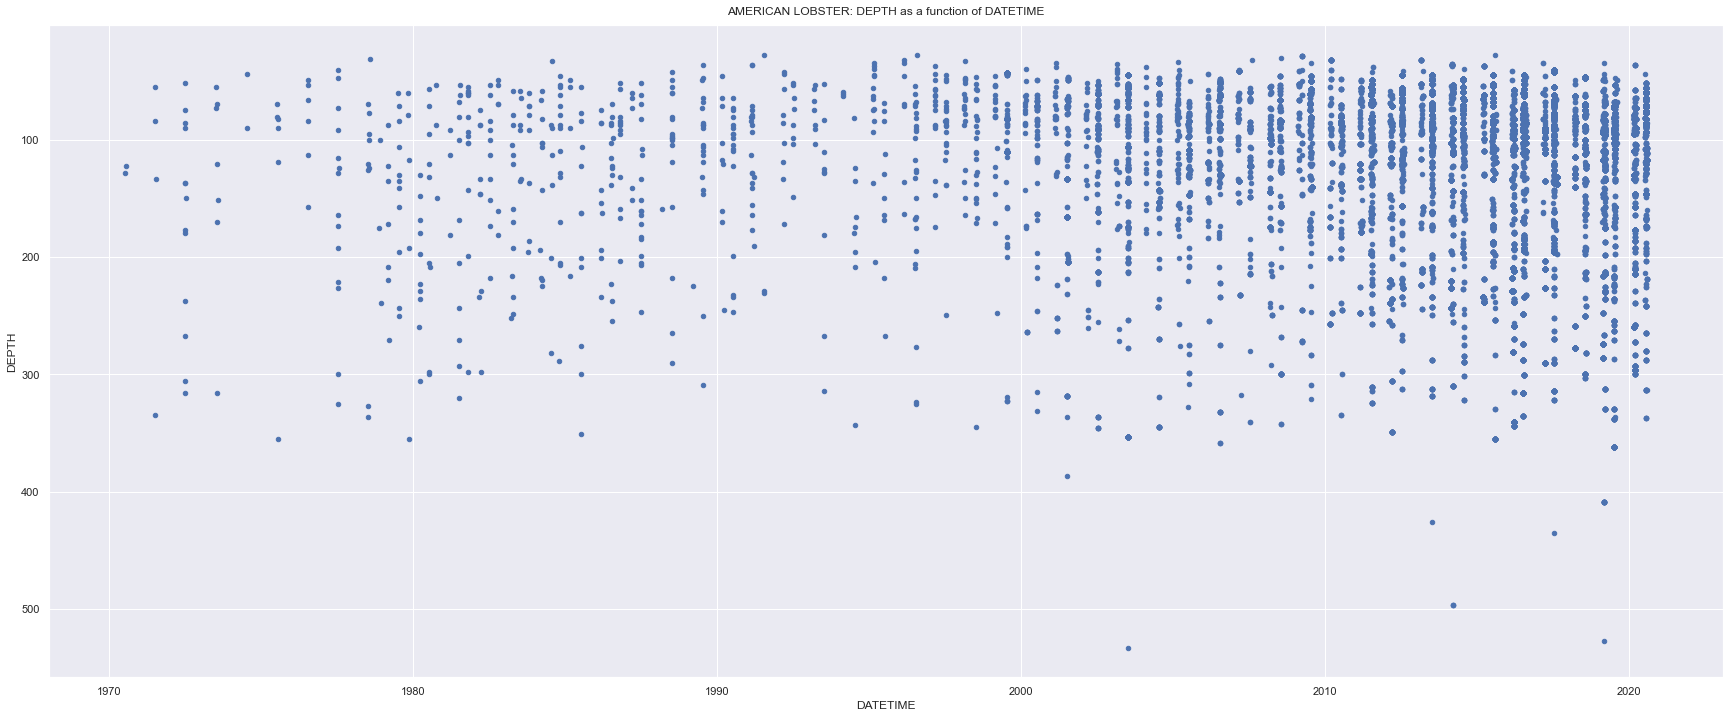

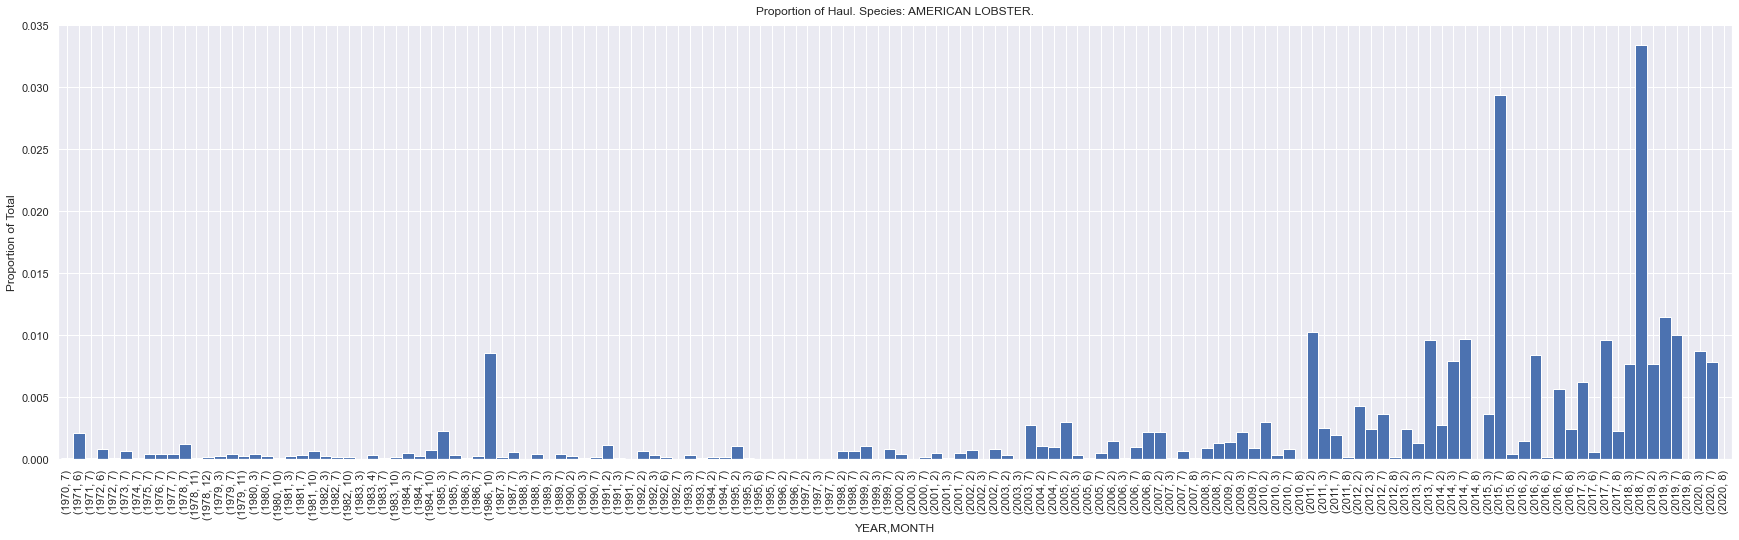

In [23]:
# it looks like the lobster population has grown a lot
rv.scatterplot_species(df, 2550)
rv.graph_species(rv.filtered_monthly(df), 2550)

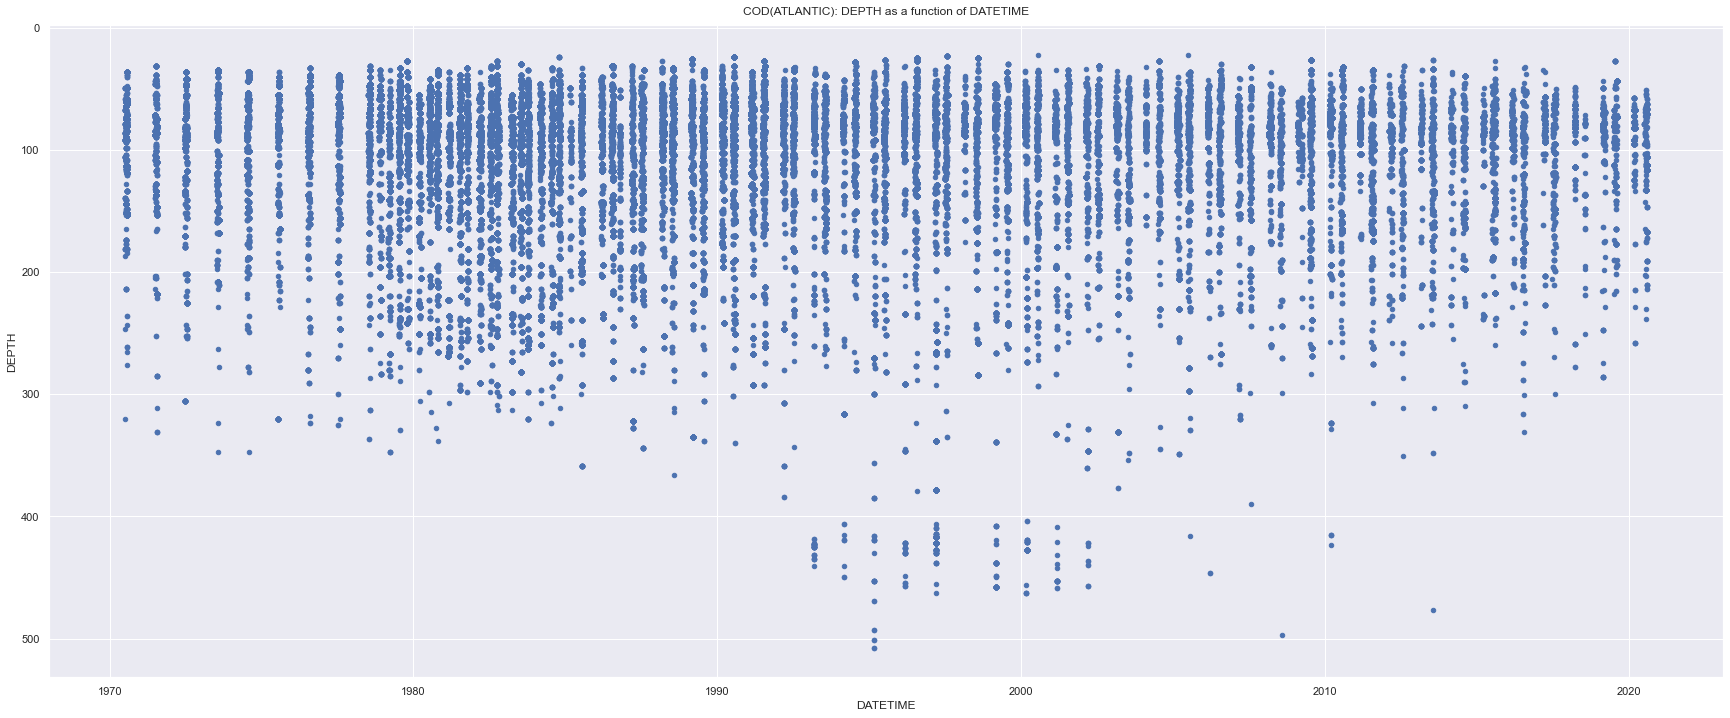

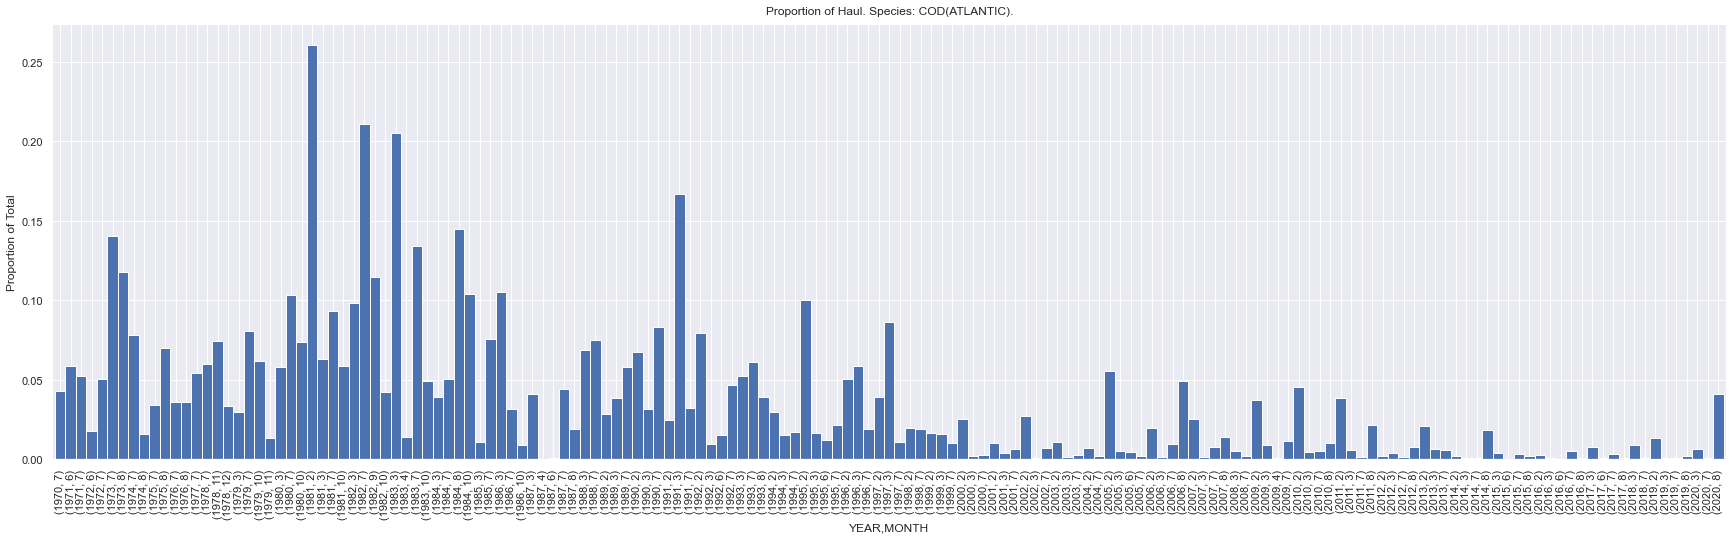

In [24]:
# conversely, cod seem to be deteriorating
rv.scatterplot_species(df, 10)
rv.graph_species(rv.filtered_monthly(df), 10)

In [25]:
# cod rank through the decades

years = ['1970', '1980', '1990', '2000', '2010', None]
species = 10

for i in range(5):
    print(rv.species_rank(df, species, date_min=years[i], date_max=years[i+1]))

4
4
4
8
14


In [26]:
# lobster rank through the decades

years = ['1970', '1980', '1990', '2000', '2010', None]
species = 2550

for i in range(5):
    print(rv.species_rank(df, species, date_min=years[i], date_max=years[i+1]))

42
46
50
24
7
